<a href="https://colab.research.google.com/github/marcofavero3/dfCaseEstudantes/blob/main/Projeto_CaseEstudantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#importação de libs

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings#ignora avisos
warnings.filterwarnings('ignore') #ignorar alguns avisos


In [29]:
#ler arquivo csv

url = 'https://raw.githubusercontent.com/marcofavero3/dfCaseEstudantes/main/StudentsPerformance.csv'
df = pd.read_csv(url)

#verificar dimensão

df.shape

(1000, 8)

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: title={'center': 'Analise de Campos Nulos'}>

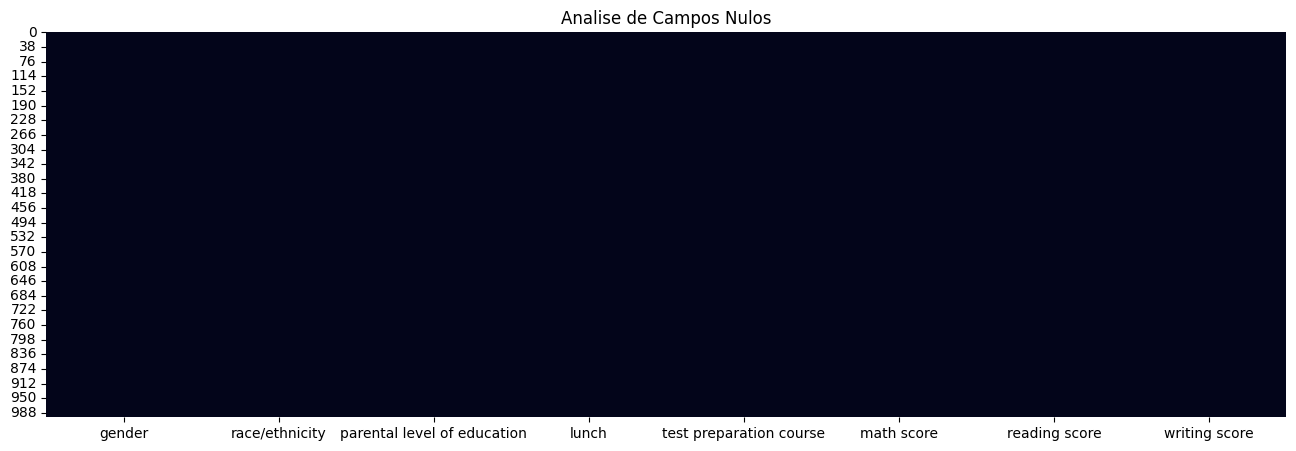

In [31]:
#VERIFICANDO SE POSSUI CAMPOS NULOS

nulos = df.isnull() #atribuo o comando isnull para a variavel nulos para assim fazer minha checagem

plt.figure(figsize=(16,5)) #altero o tamanho da "figura"
plt.title('Analise de Campos Nulos') #adiciono um titulo para minha figura
sns.heatmap(nulos, cbar=False) #chamo o seaborn com o sns fazendo um mapa de calor dos nulos, o comando cbar remove as barras de fora da figura

In [32]:
nulos.sum() #verifico todas colunas e se possui algum nulo

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
df.nunique() #utilizo o comando nunique para verificar as categorias do meu df

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [34]:
df.duplicated().sum() #verifico se possuo alguma duplicidade

0

In [35]:
df.describe() #verificar os quartis, médias, moda e mediana

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [36]:
df.info() #verificar o formato das minhas colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [37]:
df['gender'].value_counts() #verificar a coluna sexo

female    518
male      482
Name: gender, dtype: int64

In [38]:
df['gender'].value_counts(normalize=True ) * 100 #primeiro adiciono o comando normalize true para ver em % e depois passo * 100 assim consigo ver em %

female    51.8
male      48.2
Name: gender, dtype: float64

In [39]:
df['race/ethnicity'].value_counts(normalize=True ) * 100 #faço o comando para ver raça/etinia

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [40]:
df['parental level of education'].value_counts(normalize=True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [41]:
df['lunch'].value_counts(normalize=True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [42]:
df['test preparation course'].value_counts(normalize=True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

<Axes: xlabel='math score', ylabel='gender'>

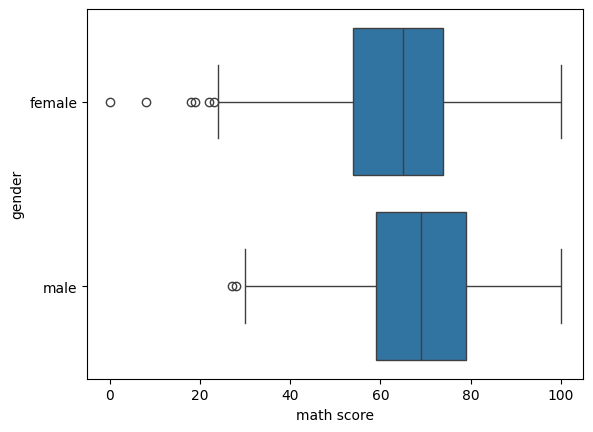

In [43]:
#PLOTAR GRAFICO DE RELAÇÃO DO SEXO COM A NOTA

sns.boxplot(data=df, x='math score', y='gender')

<Axes: xlabel='reading score', ylabel='gender'>

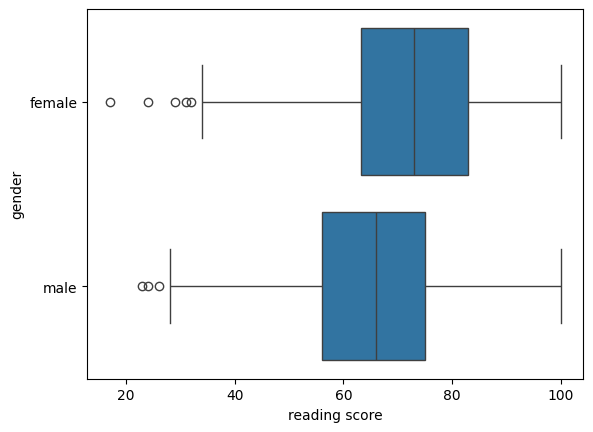

In [44]:
sns.boxplot(data=df, x='reading score', y='gender')

<Axes: xlabel='writing score', ylabel='gender'>

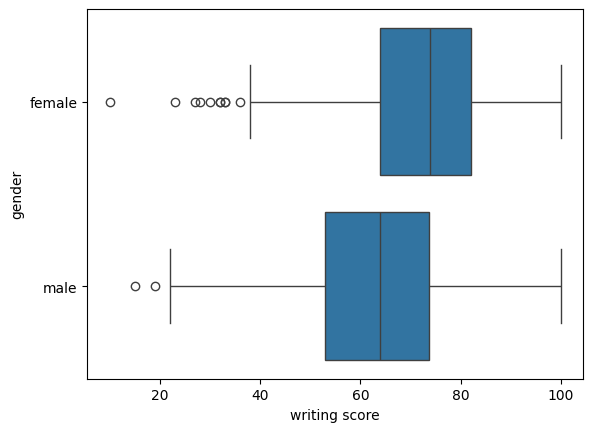

In [45]:
sns.boxplot(data=df, x='writing score', y='gender')

In [46]:
#USANDO O COMANDO GROUPBY E DESCREVENDO TODAS INFOS
df.groupby(by=['gender']).describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [47]:
df.groupby(by=['gender']).describe()['math score'].reset_index()

#apresentação dos dados, quatis, média, minimo e máximo.

,gender,count,mean,std,min,25%,50%,75%,max
0,female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
1,male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


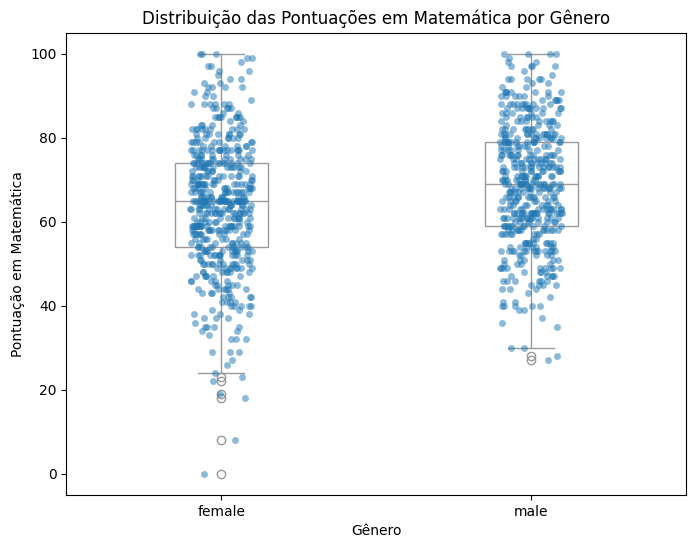

In [48]:
# Plotar um gráfico de pontos
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='gender', y='math score', jitter=True, alpha=0.5)
sns.boxplot(data=df, x='gender', y='math score', color='white', width=0.3)
plt.xlabel('Gênero')
plt.ylabel('Pontuação em Matemática')
plt.title('Distribuição das Pontuações em Matemática por Gênero')
plt.show()


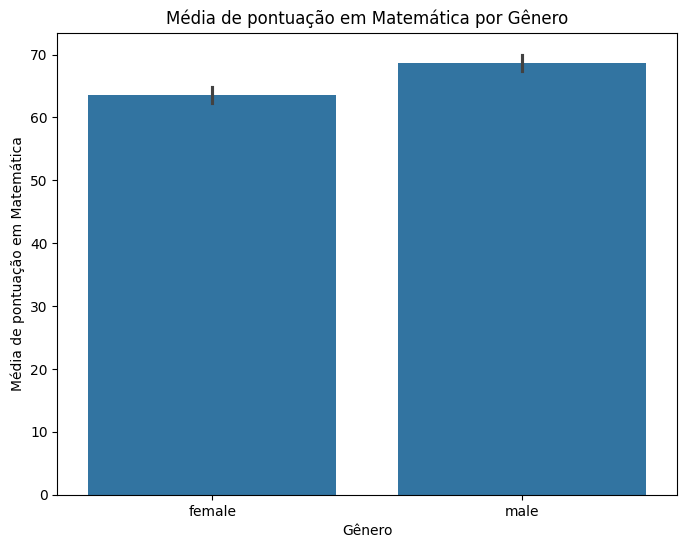

In [51]:
# Plotar um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gender', y='math score')
plt.xlabel('Gênero')
plt.ylabel('Média de pontuação em Matemática')
plt.title('Média de pontuação em Matemática por Gênero')
plt.show()


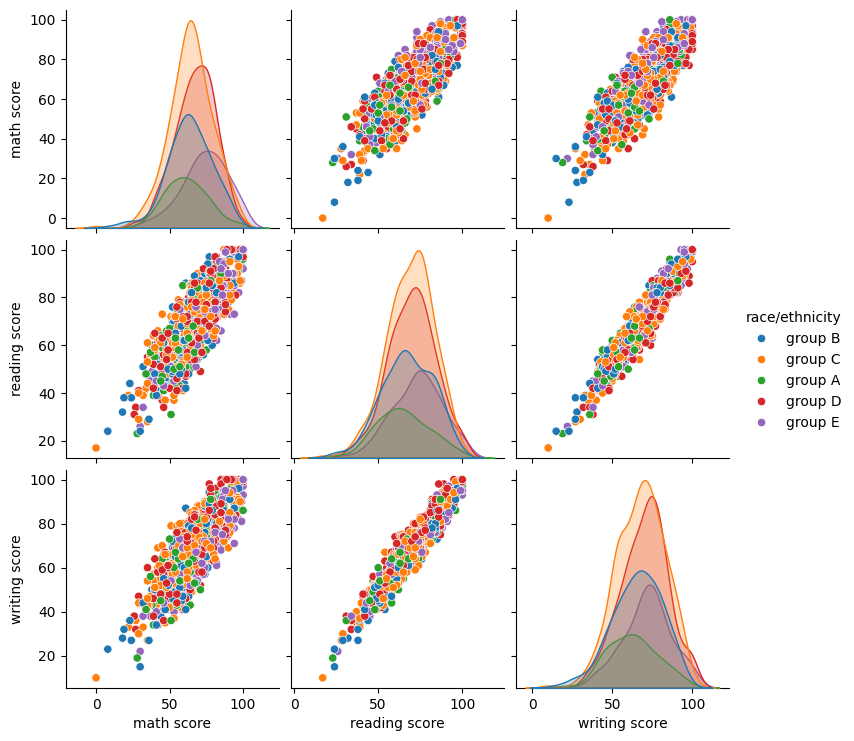

In [53]:
sns.pairplot(df, hue='race/ethnicity')

<Axes: xlabel='math score', ylabel='parental level of education'>

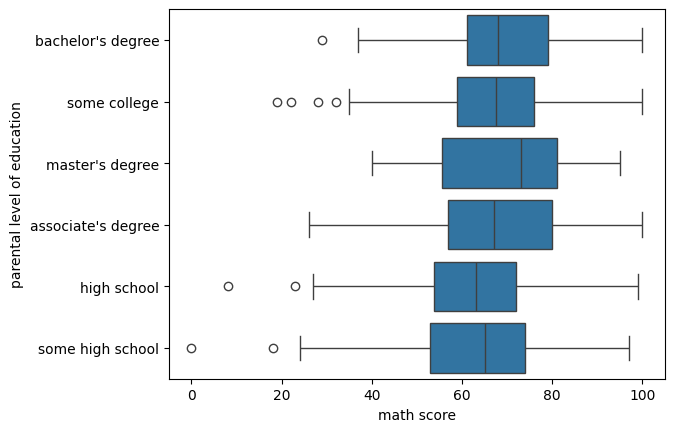

In [55]:
sns.boxplot(data=df, x='math score', y='parental level of education')

In [57]:
df.groupby(by=['parental level of education']).describe()['math score'].reset_index()


,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


<Axes: xlabel='math score', ylabel='test preparation course'>

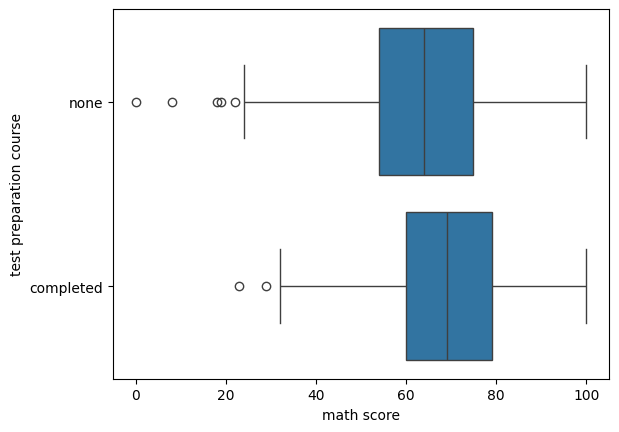

In [58]:
sns.boxplot(data=df, x='math score', y='test preparation course')

<Axes: xlabel='math score', ylabel='writing score'>

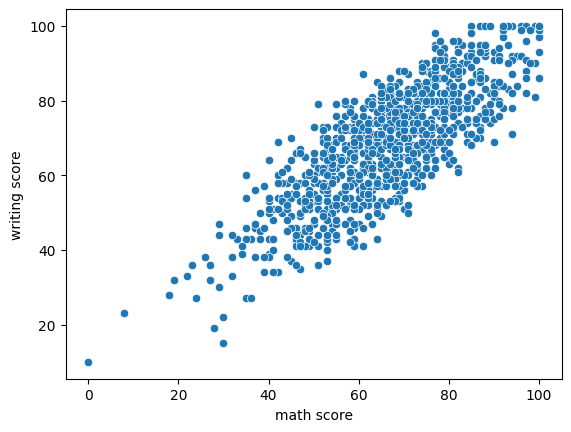

In [60]:
sns.scatterplot (data=df, x='math score', y='writing score')